<a href="https://colab.research.google.com/github/addkishore/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/1_Brain_Tumor_detection_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading a dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive2')


MessageError: ignored

In [ ]:
import zipfile
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!cp '/content/drive2/MyDrive/AI/Kaggle/kaggle.json' '/content'

In [ ]:
!kaggle datasets download -d kethusnehalatha/brain-tumor-detection

In [ ]:
!unzip /content/brain-tumor-detection.zip

Archive:  /content/brain-tumor-detection.zip
  inflating: s/no/TCGA_CS_4941_19960909_1.tif  
  inflating: s/no/TCGA_CS_4941_19960909_10.tif  
  inflating: s/no/TCGA_CS_4941_19960909_19.tif  
  inflating: s/no/TCGA_CS_4941_19960909_2.tif  
  inflating: s/no/TCGA_CS_4941_19960909_20.tif  
  inflating: s/no/TCGA_CS_4941_19960909_21.tif  
  inflating: s/no/TCGA_CS_4941_19960909_22.tif  
  inflating: s/no/TCGA_CS_4941_19960909_23.tif  
  inflating: s/no/TCGA_CS_4941_19960909_3.tif  
  inflating: s/no/TCGA_CS_4941_19960909_4.tif  
  inflating: s/no/TCGA_CS_4941_19960909_5.tif  
  inflating: s/no/TCGA_CS_4941_19960909_6.tif  
  inflating: s/no/TCGA_CS_4941_19960909_7.tif  
  inflating: s/no/TCGA_CS_4941_19960909_8.tif  
  inflating: s/no/TCGA_CS_4941_19960909_9.tif  
  inflating: s/no/TCGA_CS_4942_19970222_1.tif  
  inflating: s/no/TCGA_CS_4942_19970222_15.tif  
  inflating: s/no/TCGA_CS_4942_19970222_16.tif  
  inflating: s/no/TCGA_CS_4942_19970222_17.tif  
  inflating: s/no/TCGA_CS_4942_199

Unzipping a file 

In [ ]:
#zip_ref = zipfile.ZipFile('/content/brain-tumor-detection.zip', 'r') #Opens the zip file in read mode
#zip_ref.extractall('/tmp2') #Extracts the files into the /tmp folder
#zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# count the number of classes

Main_folder='/content/s'



In [ ]:
numberofimages={}

for dir in os.listdir(Main_folder):
  numberofimages[dir]=len(os.listdir(os.path.join(Main_folder,dir)))

In [ ]:
numberofimages.items()

dict_items([('yes', 1384), ('no', 2552)])

Splitting the data


In [ ]:
def createfolder(p,x):
  if not os.path.exists('./'+p):
    os.mkdir('./'+p)
    for dir in os.listdir(Main_folder):
      os.makedirs('./'+p+'/'+dir)               
      for img in np.random.choice(a=os.listdir(os.path.join(Main_folder,dir)),
                                  size=(math.floor(x*numberofimages[dir])-5),
                                  replace=False):
        O=os.path.join(Main_folder,dir,img)
        D=os.path.join('./'+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
          print('the folder exists ')    



In [ ]:
createfolder('train',0.7)

In [ ]:
createfolder('test',0.15)

In [ ]:


createfolder('val',0.1)

In [ ]:
numberofimages={}

for dir in os.listdir(Main_folder):
  numberofimages[dir]=len(os.listdir(os.path.join(Main_folder,dir)))


numberofimages.items()  

dict_items([('yes', 86), ('no', 144)])

Model BUilding



In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array
import keras

In [ ]:
#CNN

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preprocessingimages(path):
  ##---  input : Path   output : Pre processed images   ---
  
  image_data =  ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image



In [ ]:
tfolder='/content/test'
total_values={}

for dir in os.listdir(tfolder):
  total_values[dir]=len(os.listdir(os.path.join(tfolder,dir)))



total_values.items()

dict_items([('yes', 202), ('no', 377)])

In [ ]:
len('/content/train')

14

In [ ]:
path='/content/train'
train_data=preprocessingimages(path)

Found 2744 images belonging to 2 classes.


In [ ]:
path='/content/test'
test_data=preprocessingimages(path)

Found 579 images belonging to 2 classes.


In [ ]:
path='/content/val'
val_data=preprocessingimages(path)

Found 383 images belonging to 2 classes.


In [ ]:
# Early stopping

from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_auracy',min_delta=0.01,patience=3,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]



MODEL TRAINING

In [ ]:
hs = model.fit_generator(generator=train_data,
                        steps_per_epoch=8,
                        epochs=30,
                        verbose=1,
                        validation_data=val_data,
                        validation_steps=10,
                        callbacks=cd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.6250WARNING:tensorflow:Early stopping conditioned on metric `val_auracy` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_accuracy improved from -inf to 0.66875, saving model to ./bestmodel.h5
8/8 [==============================] - 22s 1s/step - loss: 0.6942 - accuracy: 0.6250 - val_loss: 0.6527 - val_accuracy: 0.6687
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6200 - accuracy: 0.6797WARNING:tensorflow:Early stopping conditioned on metric `val_auracy` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_accuracy did not improve from 0.66875
8/8 [==============================] - 8s 1s/step - loss: 0.6200 - accuracy: 0.6797 - val_loss: 0.6091 - val_accuracy: 0.6594
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.6719WARNING:tensorflow:Early stopping

In [ ]:
# Val loss and loss shouldnt be too high
# Check val accuraccy
# Diff btw valAccuracy and accuracy is not more tha 10... U cam consider it as good model.


Checking the model


In [ ]:
h= hs.history
# h.keys()

Text(0.5, 1.0, 'acc vs valacc')

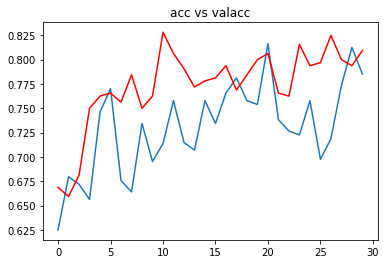

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs valacc')

Text(0.5, 1.0, 'loss vs valloss')

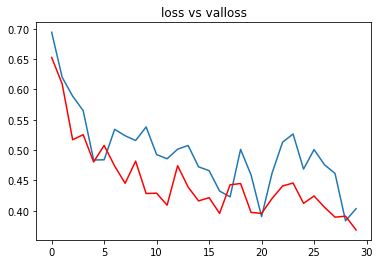

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs valloss')

In [ ]:
from keras.models import load_model
model = load_model('/content/bestmodel.h5')


In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f'The acc is {acc*100}%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The acc is 76.16580128669739%


----Do it Later (https://www.youtube.com/watch?v=7MceDfpnP8k&t=3334s)

----Evaluating new Image and Trans
fer Learning

Evaluating new Image

In [ ]:
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
path='/content/s/yes/TCGA_CS_6667_20011105_15.tif'

img=load_img(path,target_size=(224,224))
input_array=img_to_array(img)/255


In [ ]:
input_array.shape

(224, 224, 3)

In [ ]:
input_array= np.expand_dims(input_array,axis=0)




In [ ]:
predictions = (model.predict(input_array) > 0.5)*1 

ValueError: ignored